---
title: "Annotating single points in datasets"
author: "Damien Martin"
date: "2024-05-01 11:00"
categories: [data-vis, plotnine, snippet]
image: "image.jpg"
description: "How to annotate single data points in a plot"
---

# Example

We are going to use the Kaggle [retail sales](https://www.kaggle.com/datasets/manjeetsingh/retaildataset) dataset, and make predictions for Store 1. The modelling is not very sophisticated (no partial pooling amongst the different stores, or use of exogeneous variables). Instead I built two simple models:

- A SARIMA model
- A Prophet model (generalized additive components)

This is just to give a couple of different forecasts to track. The business requirement is that we always want the actuals to be black.

In [40]:
import pandas as pd
import plotnine as p9

sales = pd.read_pickle('single_store_forecasts.pickle')
today = sales.loc[sales['forecast']=='actuals', 'Date'].max()
sales['is_future'] = sales['Date'] > today
sales

,Date,Weekly_Sales,forecast,is_future
0,2010-02-05,1.643691,actuals,False
45,2010-02-12,1.641957,actuals,False
90,2010-02-19,1.611968,actuals,False
135,2010-02-26,1.409728,actuals,False
180,2010-03-05,1.554807,actuals,False
...,...,...,...,...
503,2013-10-18,1.585226,prophet,True
504,2013-10-19,1.582930,prophet,True
505,2013-10-20,1.581724,prophet,True
506,2013-10-21,1.581733,prophet,True


Let's make the simplest plot out of the box:

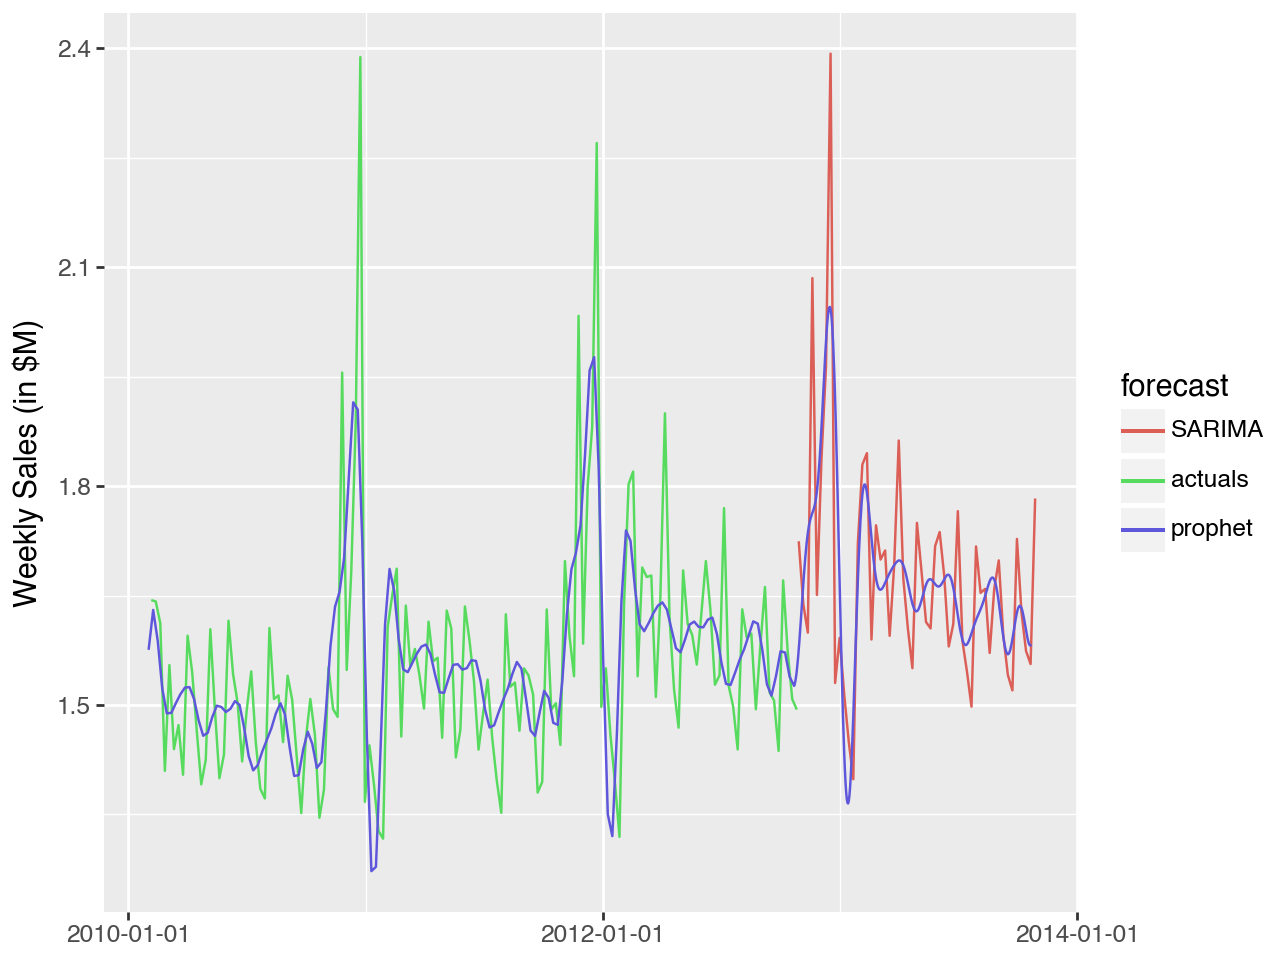

In [41]:
(
    p9.ggplot(
        sales, 
        p9.aes(x='Date', y='Weekly_Sales', group='forecast', color='forecast')
    )
    + p9.geom_line()
    + p9.labs(x="", y="Weekly Sales (in $M)")
)

We can make a version that only applies to the actuals:

/Users/damienmartin/anaconda3/envs/blog/lib/python3.12/site-packages/plotnine/scales/scale_manual.py:44: PlotnineWarning: The palette of scale_color_manual can return a maximum of 1 values. 3 were requested from it.
/Users/damienmartin/anaconda3/envs/blog/lib/python3.12/site-packages/plotnine/scales/scale_manual.py:44: PlotnineWarning: The palette of scale_color_manual can return a maximum of 1 values. 3 were requested from it.


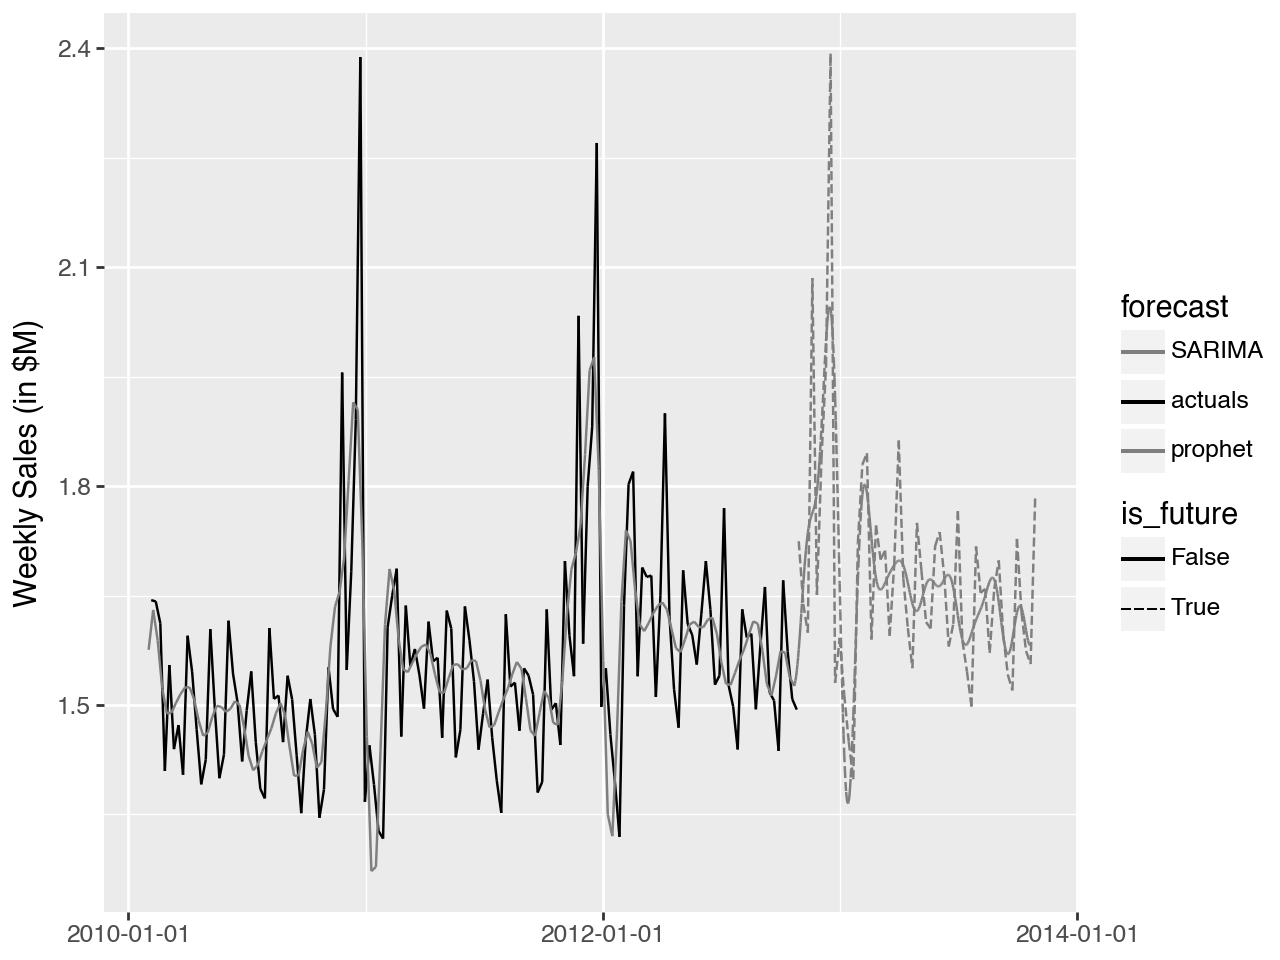

In [42]:
(
    p9.ggplot(
        sales, 
        p9.aes(x='Date', y='Weekly_Sales', group='forecast', color='forecast', linetype='is_future')
    )
    + p9.geom_line()
    + p9.labs(x="", y="Weekly Sales (in $M)")
    + p9.scale_color_manual(
        values={"actuals": "black",}
    )
)

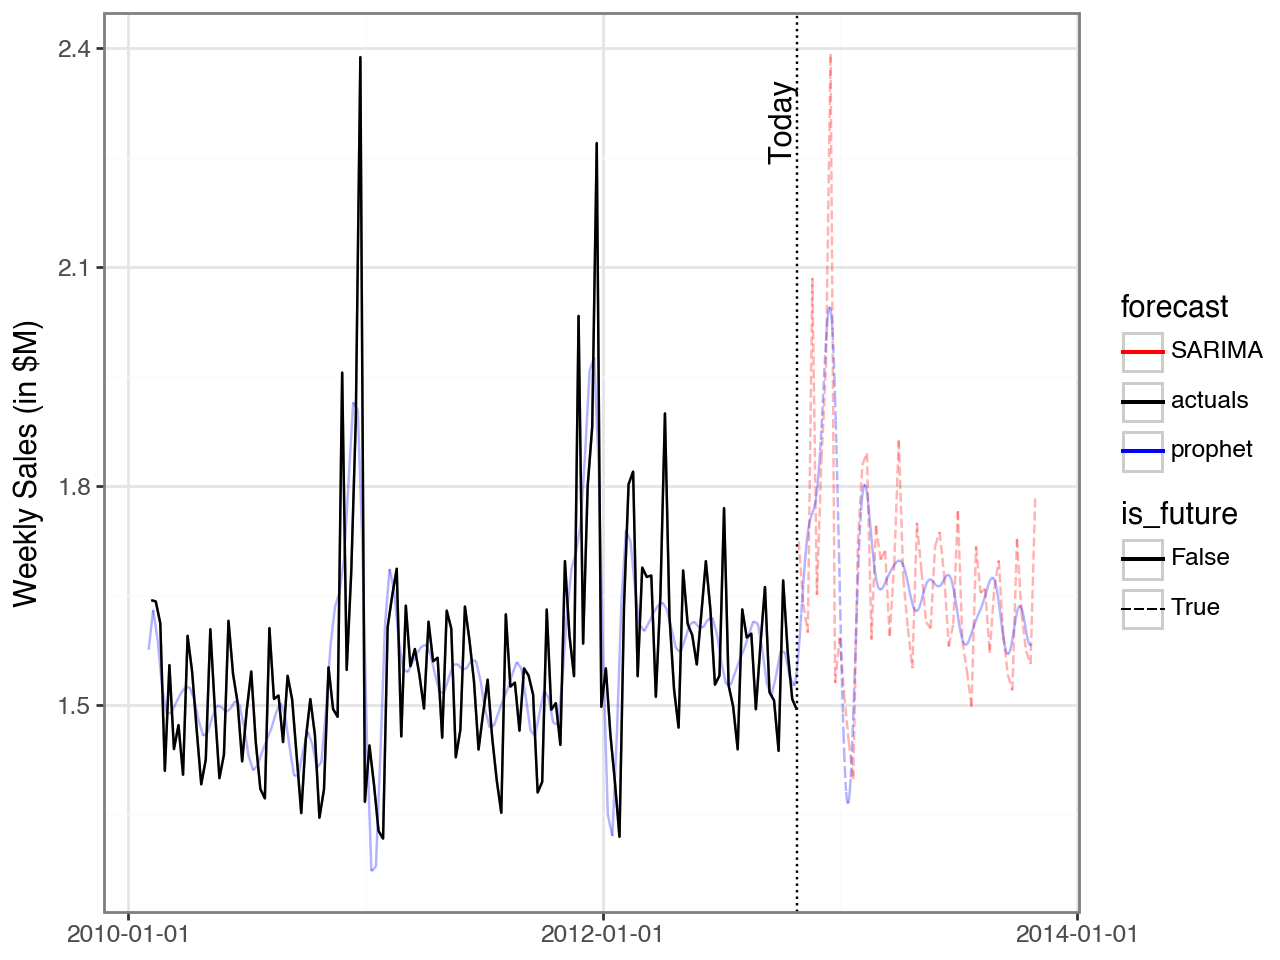

In [48]:
# We can also be more prescriptive
(
    p9.ggplot(
        sales, 
        p9.aes(x='Date', y='Weekly_Sales', group='forecast', color='forecast', linetype='is_future')
    )
    + p9.geom_line(alpha=0.3)
    + p9.geom_line(data=sales[sales['forecast']=='actuals'], alpha=1)
    + p9.labs(x="", y="Weekly Sales (in $M)")
    + p9.scale_color_manual(
        values={"actuals": "black", "SARIMA": "red", "prophet": "blue"}
    )
    + p9.theme_bw()
    + p9.geom_vline(xintercept=today, linetype='dotted')
    + p9.annotate('text', x=today, y=2.3, label='Today', nudge_x=-20, angle=90)
)